## Wavelet thresholding for image denoising
from Convex Optimization, Sheet 8, Exercise 2

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from numpy.linalg import norm
import matplotlib.image as Image
import pywt

In [2]:
def soft_shrinkage(mat, factor=1):
    abs_mat = np.abs(mat)
    sign_mat = mat/abs_mat
    shrink_mat = np.where(abs_mat<factor, 0, abs_mat-factor)
    return sign_mat*shrink_mat

#signal-to-noise ratio
def cal_snr(f0, f1):
    norm = np.linalg.norm(f0)/np.linalg.norm(f0-f1)
    return 20*np.log10(norm)

def reconstruct(f, factor):
    wave_name = "haar"
    L = 4
    wavelet = pywt.Wavelet(wave_name)
    coeffs = pywt.wavedec2(f, wavelet, level=L)
    f_ = pywt.waverec2(coeffs, wave_name)
    coeffs_thresh = []
    for c in coeffs:
        if isinstance(c, tuple):
            cH = soft_shrinkage(c[0], factor)
            cV = soft_shrinkage(c[1], factor)
            cD = soft_shrinkage(c[2], factor)
            coeffs_thresh.append((cH, cV, cD))
        else:
            coeffs_thresh.append(soft_shrinkage(c, factor))
    f_hat = pywt.waverec2(coeffs_thresh, wave_name)
    return f_, f_hat

[[ 1.59522588e-02 -5.43096088e-02 -6.26230210e-05 ...  1.02735594e+00
   9.66846169e-01  9.01506538e-01]
 [ 7.73083382e-03 -9.65298745e-02  1.11527486e-01 ...  1.04965572e+00
   8.38635236e-01  1.01376697e+00]
 [-1.37182340e-01  3.40927087e-02  1.05249392e-01 ...  1.01921006e+00
   9.57419362e-01  8.73108869e-01]
 ...
 [ 9.05121446e-01  9.44516937e-01  1.03349904e+00 ...  5.89232664e-01
   6.56070724e-01  5.46619144e-01]
 [ 9.32377917e-01  9.71050083e-01  9.52032730e-01 ...  6.55586873e-01
   5.53076189e-01  8.89854749e-01]
 [ 9.86055183e-01  9.15319063e-01  8.93007565e-01 ...  5.48474863e-01
   6.26157103e-01  6.32211537e-01]]
[[-0.00241925 -0.00241925  0.01899208 ...  0.99310052  0.99321836
   0.99298268]
 [-0.00241925 -0.00241925  0.01899208 ...  0.99310052  0.99298268
   0.99321836]
 [-0.03614235  0.03130386  0.03197656 ...  0.99310052  0.99310052
   0.99310052]
 ...
 [ 0.98086894  0.98086894  0.98428922 ...  0.65775018  0.66024573
   0.66024573]
 [ 0.98086894  0.98086894  0.980868

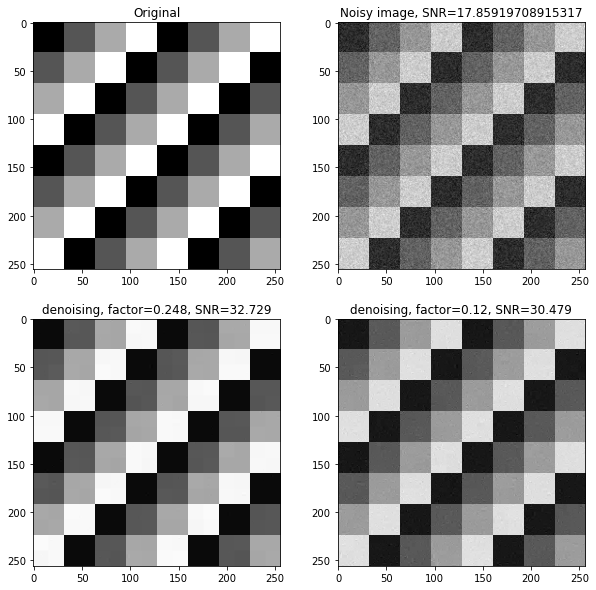

In [17]:
## Barbara.jpg
#f0 = Image.imread('barbara 2.jpg ')
## Squares.jpg
f0 = Image.imread('squares.jpg ')
f0 = f0/255 # rescale
n = f0.shape[0]
sigma = 0.08
f = f0 + sigma*np.random.randn(n,n) # add Gaussian noise
fig, ax = plt.subplots(2,2, figsize=(10, 10))
ax[0,0].set_title("Original")
ax[0,0].imshow(f0, cmap='gray')
ax[0,1].set_title("Noisy image, SNR="+ str(cal_snr(f0, f)))
ax[0,1].imshow(f, cmap='gray')
factor = 0.248
f_, f_hat = reconstruct(f, factor)
snr = round(cal_snr(f0, f_hat), 3)
ax[1,0].set_title("denoising, factor="+str(factor) + ", SNR=" + str(snr))
ax[1,0].imshow(f_hat, cmap='gray')
factor = 0.12
f_, f_hat = reconstruct(f, factor)
snr = round(cal_snr(f0, f_hat), 3)
ax[1,1].set_title("denoising, factor="+str(factor) + ", SNR=" + str(snr))
ax[1,1].imshow(f_hat, cmap='gray')